In [92]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1" # for hera
import matplotlib.pyplot as plt
import sys,time
from numpy import pi
import numpy as np
sys.path.append('../')
import rcwa
from fft_funs import get_conv

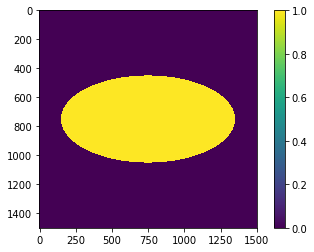

In [94]:
# discretization for patterend layer
Nx = 1500
Ny = 1500
r2 = 0.4
r1 = 0.2
# let's setup a cylinder grid, and here we plot eps_patterend to double check

dof = np.zeros((Nx,Ny))
x0 = np.linspace(0,1.,Nx)
y0 = np.linspace(0,1.,Ny)
x, y = np.meshgrid(x0,y0,indexing='ij')
sphere = (x-.5)**2/r1**2+(y-.5)**2/r2**2<1
dof[sphere]=1
plt.figure();
plt.imshow(dof)
plt.colorbar()
plt.show()

In [131]:
reload(rcwa)
nG = 191
# lattice vector
Lx = .1
Ly = .1
L1 = [Lx,0.]
L2 = [0.,Ly]

# frequency and angles
freq = 1.
theta = np.pi/7
phi = 0.

# now consider three layers: vacuum + patterned + vacuum
epsuniform1 = 2.
epsuniform2 = 1.
thick1 = 1.
thick2 = .2
thick3 = 1.

# for patterned layer, eps = epsbkg + dof * epsdiff
epsbkg = 1.
epsdiff = -4+.2j

# setup RCWA
obj = rcwa.RCWA_obj(nG,L1,L2,freq,theta,phi)
obj.Add_LayerUniform(thick1,epsuniform1)
obj.Add_LayerGrid(thick2,epsdiff,epsbkg,Nx,Ny)
obj.Add_LayerUniform(thick3,epsuniform2)
obj.Init_Setup(Gmethod=0)
# add DOF to rcwa
obj.GridLayer_getDOF(dof.flatten())

('Total nG = ', 185)


In [132]:
p_amp = 1.
s_amp = 0.
p_phase = 0.
s_phase = 0.

obj.MakeExcitationPlanewave(p_amp,p_phase,s_amp,s_phase,order = 0)
R,T= obj.RT_Solve(normalize=1)
# this is merely reflected and transmitted power
# To get the reflection and transmission coefficient, some normalization is needed
print "R=",R,", T=",T,", Abs=",1-R-T

R= 0.0793770106553982 , T= 0.024140269749055022 , Abs= 0.8964827195955468


In [133]:
epimag = np.imag(epsdiff)*dof
Mv = get_conv(1./Nx/Ny,epimag,obj.G)
val = obj.Volume_integral(1,Mv,Mv,Mv,normalize=1)
print np.real(val*obj.omega)

0.8884422942630321
